### InverseTimeDecay Learning Rate

In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

train_size = 10000
batch_size = 64
epochs = 150
initial_learning_rate = 0.01
decay_rate = 2.0

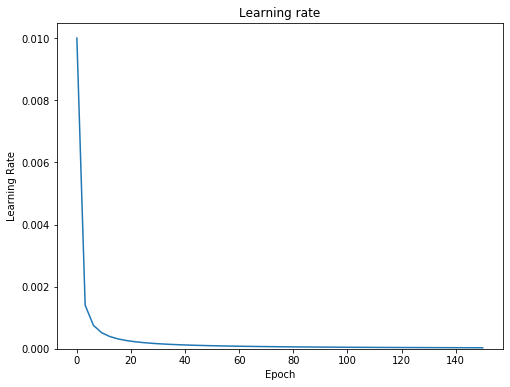

In [50]:
# By using InverseTimeDecay
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps = train_size // batch_size,
    decay_rate = decay_rate,
    staircase = False
)

# Plot the function
step_per_epoch = train_size // batch_size
step = np.linspace(0,step_per_epoch*epochs)

lr = lr_schedule(step)

plt.figure(figsize = (8,6))
plt.plot(step/step_per_epoch, lr)
plt.ylim([0,max(plt.ylim())])
plt.title('Learning rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate');

# opt = tf.keras.optimizers.SGD(lr_schedule)

In [51]:
print (lr.numpy())

[9.9999998e-03 1.4040114e-03 7.5500767e-04 5.1633298e-04 3.9231384e-04
 3.1633311e-04 2.6500810e-04 2.2801303e-04 2.0008166e-04 1.7824664e-04
 1.6070843e-04 1.4631233e-04 1.3428336e-04 1.2408204e-04 1.1532125e-04
 1.0771598e-04 1.0105176e-04 9.5164112e-05 8.9924761e-05 8.5232205e-05
 8.1005121e-05 7.7177509e-05 7.3695293e-05 7.0513743e-05 6.7595523e-05
 6.4909262e-05 6.2428335e-05 6.0130074e-05 5.7995028e-05 5.6006396e-05
 5.4149630e-05 5.2412019e-05 5.0782462e-05 4.9251179e-05 4.7809543e-05
 4.6449903e-05 4.5165452e-05 4.3950127e-05 4.2798492e-05 4.1705676e-05
 4.0667273e-05 3.9679326e-05 3.8738239e-05 3.7840760e-05 3.6983922e-05
 3.6165027e-05 3.5381614e-05 3.4631423e-05 3.3912380e-05 3.3222590e-05]


### Data Augmentation

In [ ]:
def train_preprocess(image, label):
    image = tf.image.random_flip_left_right(image)

    image = tf.image.random_brightness(image, max_delta=32.0 / 255.0)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)

    #Make sure the image is still in [0, 1]
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image, label